
## Time sequence 

* knn
* boosting



In [50]:

## !pip install pmdarima


In [51]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



import warnings
## warnings.filterwarnings('ignore')
from statsmodels.tsa.api import seasonal_decompose, adfuller


In [52]:

import sktime
import statsmodels as sm
import matplotlib 
import sklearn

from sklearn.linear_model import( LinearRegression, 
                                 ElasticNet, 
                                 Ridge, 
                                 Lasso, 
                                 HuberRegressor)


from sktime.performance_metrics.forecasting import(MeanAbsolutePercentageError, 
                                                   MeanSquaredError, 
                                                   MeanAbsoluteScaledError)

from statsmodels.graphics.tsaplots import plot_acf


In [53]:

from sklearn.ensemble import (RandomForestRegressor, 
                              GradientBoostingRegressor, 
                              ExtraTreesRegressor)


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor



In [54]:

'''
from sktime.forecasting.all import (
        Deseasonalizer, Detrender, 
        temporal_train_test_split,
        mean_absolute_percentage_error as mape, 
        mean_squared_percentage_error as mspe,
        mean_squared_error as mse, 
        ForecastingHorizon, 
        NaiveForecaster,
        TransformedTargetForecaster,
        PolynomialTrendForecaster
)
'''


################# from sktime.forecasting.all import        Deseasonalizer
################# from sktime.forecasting.all import        Detrender
################# from sktime.forecasting.all import        temporal_train_test_split
################# from sktime.forecasting.all import        mean_absolute_percentage_error as mape
################# from sktime.forecasting.all import        mean_squared_percentage_error as mspe
################# from sktime.forecasting.all import        mean_squared_error as mse 
################# from sktime.forecasting.all import        ForecastingHorizon
#################from sktime.forecasting.all import        NaiveForecaster
################# from sktime.forecasting.all import        TransformedTargetForecaster
##################from sktime.forecasting.all import        PolynomialTrendForecaster




'\nfrom sktime.forecasting.all import (\n        Deseasonalizer, Detrender, \n        temporal_train_test_split,\n        mean_absolute_percentage_error as mape, \n        mean_squared_percentage_error as mspe,\n        mean_squared_error as mse, \n        ForecastingHorizon, \n        NaiveForecaster,\n        TransformedTargetForecaster,\n        PolynomialTrendForecaster\n)\n'

In [55]:
'''
from sktime.registry import all_estimators
from sktime.datasets import load_airline

from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import make_reduction

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sktime.forecasting.var import VAR

from sktime.datasets import load_airline
warnings.filterwarnings("ignore")
'''

from sktime.transformations.series.detrend import Deseasonalizer
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError as mape
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.performance_metrics.forecasting import mean_squared_percentage_error as mspe
from sktime.performance_metrics.forecasting import mean_squared_error as mse
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error as  mase 


In [56]:



from sktime.forecasting.compose import make_reduction



In [61]:

from pmdarima import auto_arima


from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.split import                  SlidingWindowSplitter
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError



In [7]:

energy = pd.read_csv('data/energy_consumption.csv', 
                     index_col='Month', 
                     parse_dates=True
)

energy.columns = ['y']


In [8]:

energy.index.freq = 'MS'


In [9]:

print( energy.index.freq )


<MonthBegin>


<Axes: title={'center': 'Monthly Energy Consumption'}, xlabel='Month'>

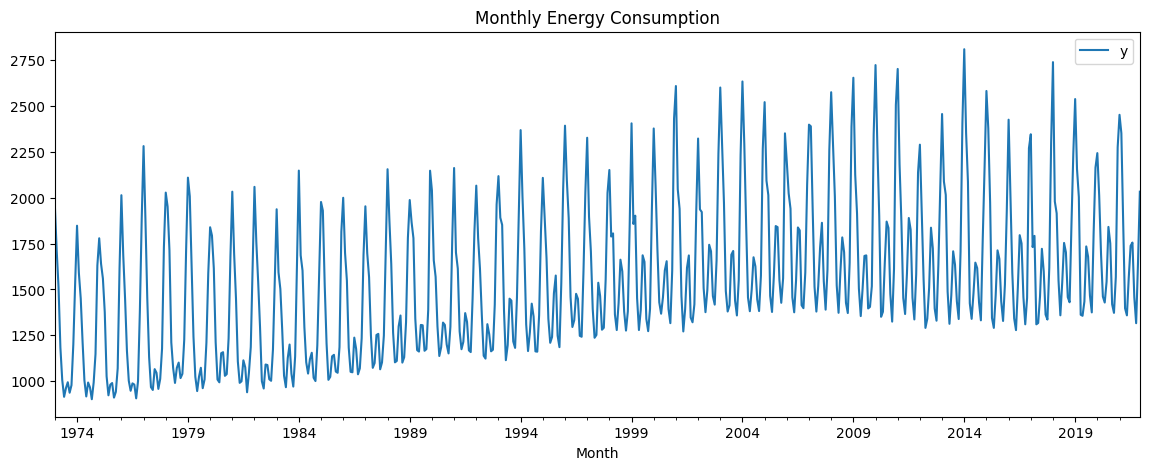

In [10]:

plt.rcParams["figure.figsize"] = [14, 5]  


energy.plot(    title='Monthly Energy Consumption')



In [11]:

energy.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 588 entries, 1973-01-01 to 2021-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       588 non-null    float64
dtypes: float64(1)
memory usage: 9.2 KB


In [12]:

df = energy.copy()


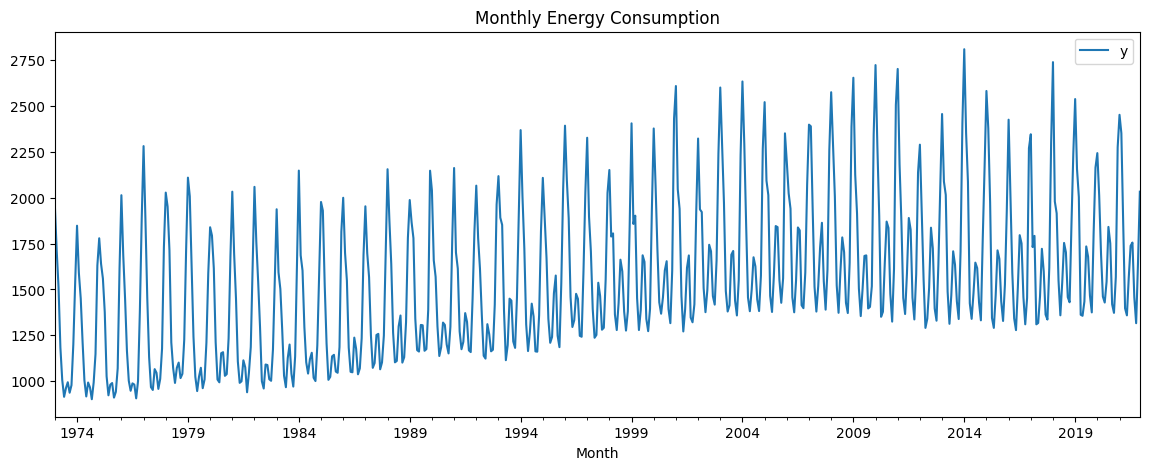

In [13]:

df.plot(title='Monthly Energy Consumption');plt.show()


In [14]:

df.head()


,y
Month,
1973-01-01,1957.641
1973-02-01,1712.143
1973-03-01,1510.079
1973-04-01,1183.421
1973-05-01,1006.326


In [15]:

df.tail()


,y
Month,
2021-08-01,1755.212
2021-09-01,1456.901
2021-10-01,1315.799
2021-11-01,1644.306
2021-12-01,2032.352


In [16]:

df.index.year.unique()


Index([1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021],
      dtype='int32', name='Month')

In [17]:

df.shape


(588, 1)

In [18]:

def split_data(df, test_split=0.15):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test


In [19]:

train, test = split_data(df)


In [20]:

train.shape


(500, 1)

In [21]:

test.shape


(88, 1)

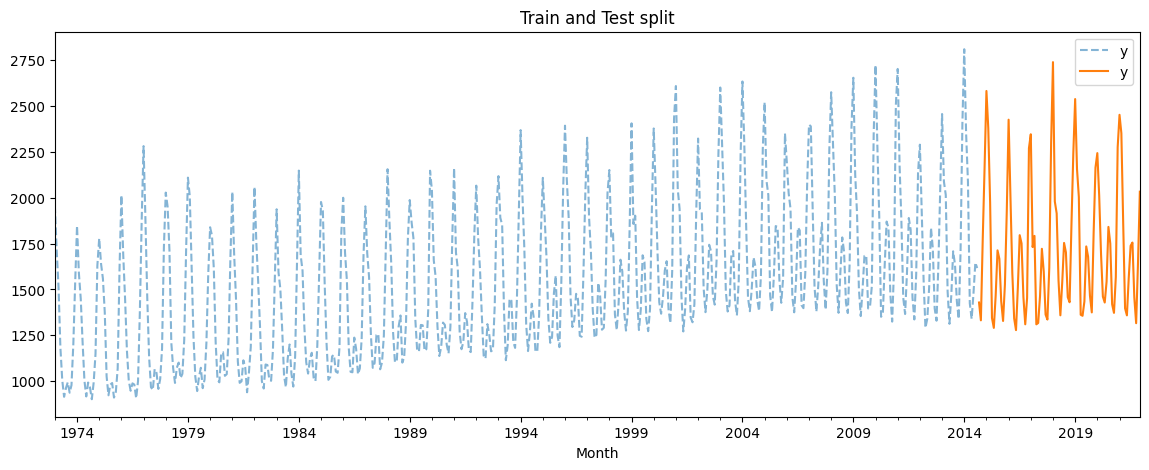

In [22]:

ax = train.plot(style='--', alpha=0.55)
test.plot(ax=ax)

plt.title('Train and Test split')
plt.show()


In [25]:

test.tail()


,y
Month,
2021-08-01,1755.212
2021-09-01,1456.901
2021-10-01,1315.799
2021-11-01,1644.306
2021-12-01,2032.352


In [26]:

adfuller(df)


(-1.4497331132437519,
 0.5582151234544165,
 12,
 575,
 {'1%': -3.4417738839904657,
  '5%': -2.8665796253604015,
  '10%': -2.569453974291115},
 6916.648218486183)

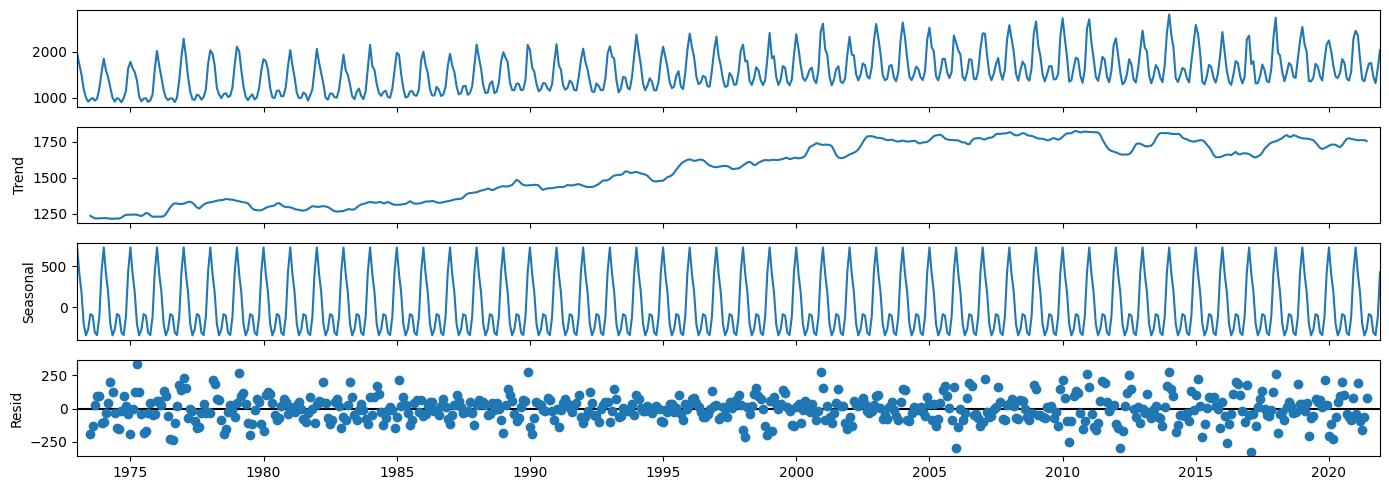

In [27]:

decomposed = seasonal_decompose(df)
decomposed.plot();


In [28]:

test.index


DatetimeIndex(['2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
      

In [29]:

def make_forecast(data, n, regressor, window=12):
    fh = ForecastingHorizon(np.arange(n) + 1, is_relative=True)
    forecaster = [
            ("deseasonalize", Deseasonalizer(sp=12, model="additive")),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1)))]
    if not isinstance(regressor, NaiveForecaster):
        reg = ("forecaster", make_reduction(
            regressor,
            strategy='recursive',
            window_length=window,
            scitype='tabular-regressor'))
        forecaster.append(reg)
        model = TransformedTargetForecaster(forecaster).fit(data.values)
        
    else:
        model = regressor.fit(data.values)
    
    predicted = pd.Series(
            model.predict(fh=fh).reshape(-1),
            index= test.index
                    )
    return predicted


In [31]:

lr = LinearRegression()


In [32]:

make_reduction(lr)


RecursiveTabularRegressionForecaster(estimator=LinearRegression())

In [34]:

regressors = {
            'Naive Forecaster' :           NaiveForecaster(strategy='mean', sp=12),
            'Linear Regression':           LinearRegression(),
            'K-NN Regressor':              KNeighborsRegressor(n_neighbors=5),
            'Extra Tree Regressor':        ExtraTreesRegressor(),
            'Random Forest Regressor':     RandomForestRegressor(),
            'Gradient Boosting Regressor': GradientBoostingRegressor()
            }

for k, reg in regressors.items():
    print(f'training {reg} ...')
    test[k] = make_forecast(train, len(test), regressor=reg , window=15)


training NaiveForecaster(sp=12, strategy='mean') ...
training LinearRegression() ...
training KNeighborsRegressor() ...
training ExtraTreesRegressor() ...


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_966/3037913710.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[k] = make_forecast(train, len(test), regressor=reg , window=15)
/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_966/3037913710.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[k] = make_forecast(train, len(test), regressor=reg , window=15)
/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_966/3037913710.py:12: SettingWithCopyWarning: 
A value is try

training RandomForestRegressor() ...
training GradientBoostingRegressor() ...


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_966/3037913710.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[k] = make_forecast(train, len(test), regressor=reg , window=15)
/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_966/3037913710.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[k] = make_forecast(train, len(test), regressor=reg , window=15)


In [35]:

test.shape


(88, 7)

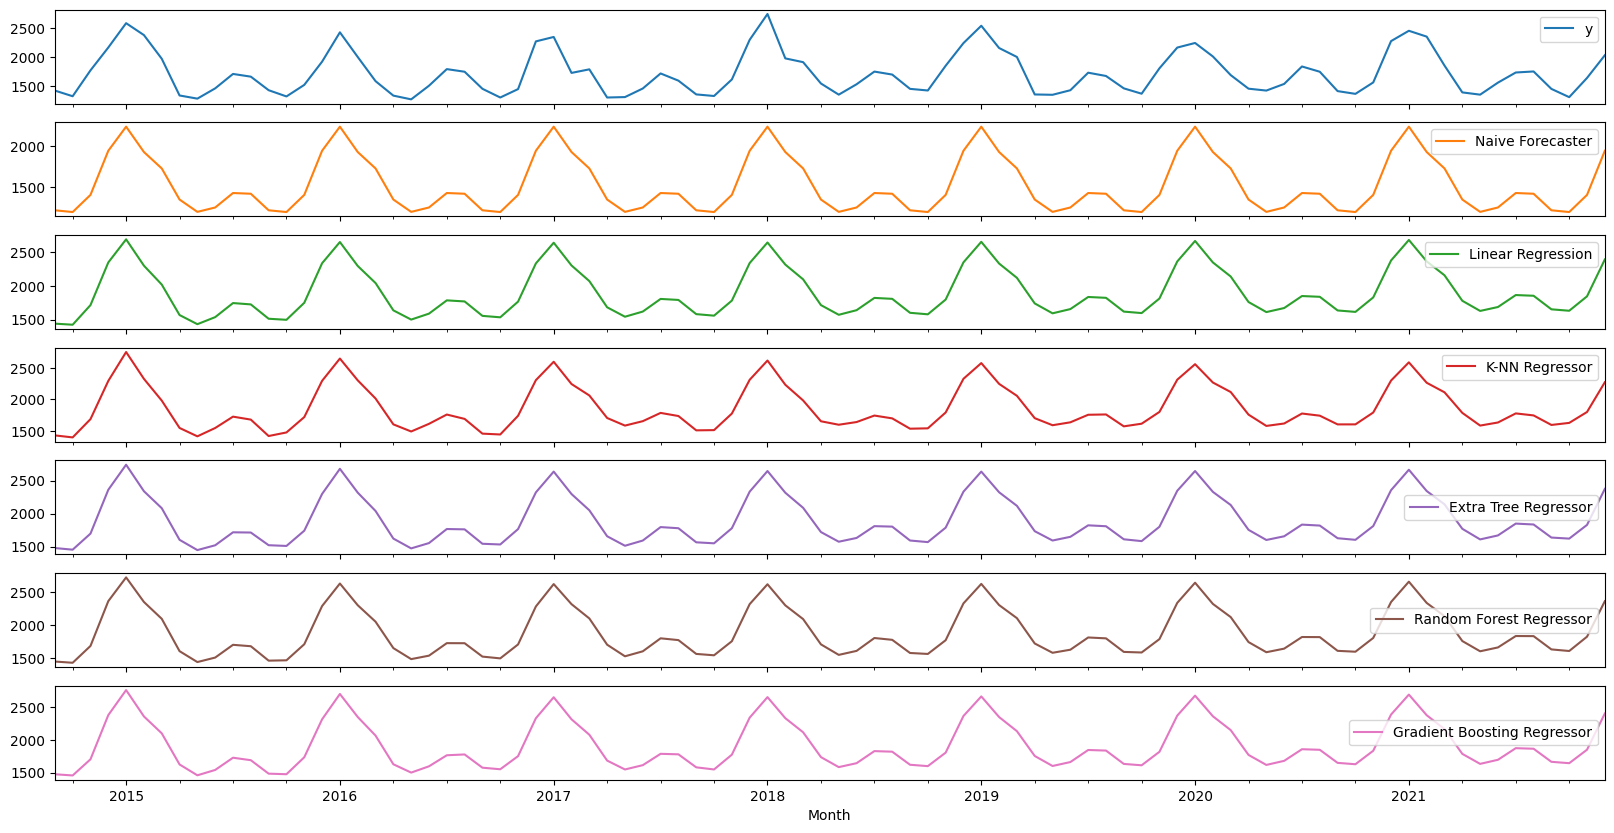

In [36]:

test.plot(subplots=True, figsize=(20, 10));plt.show()


<Axes: xlabel='Month'>

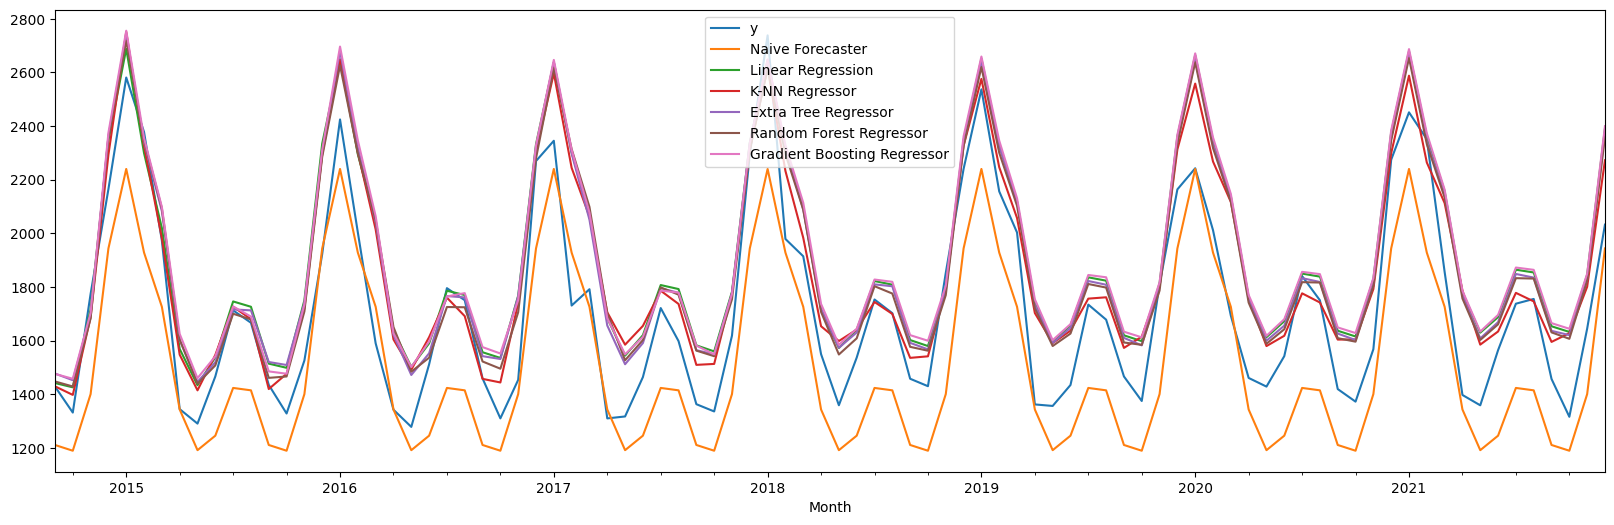

In [37]:

test.plot(subplots=False, figsize=(20, 6))


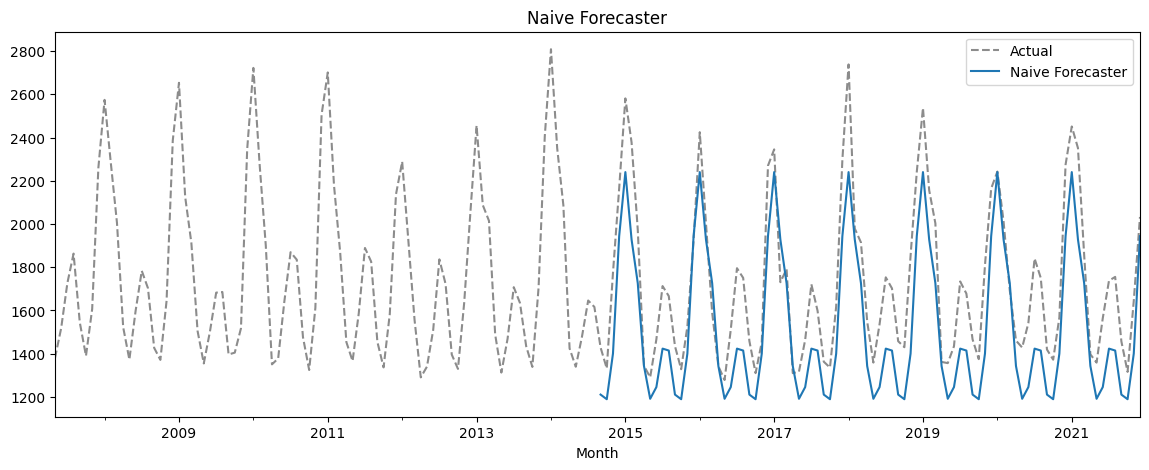

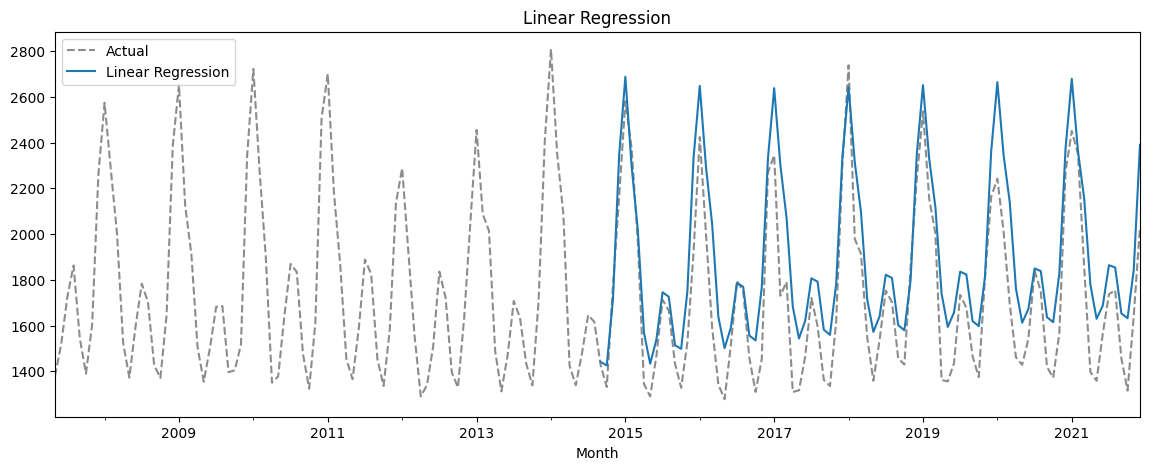

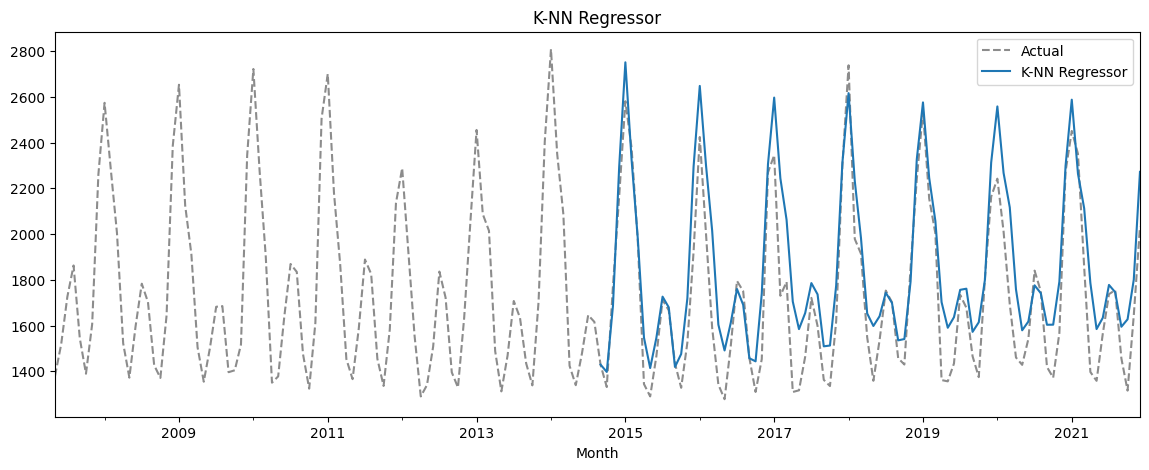

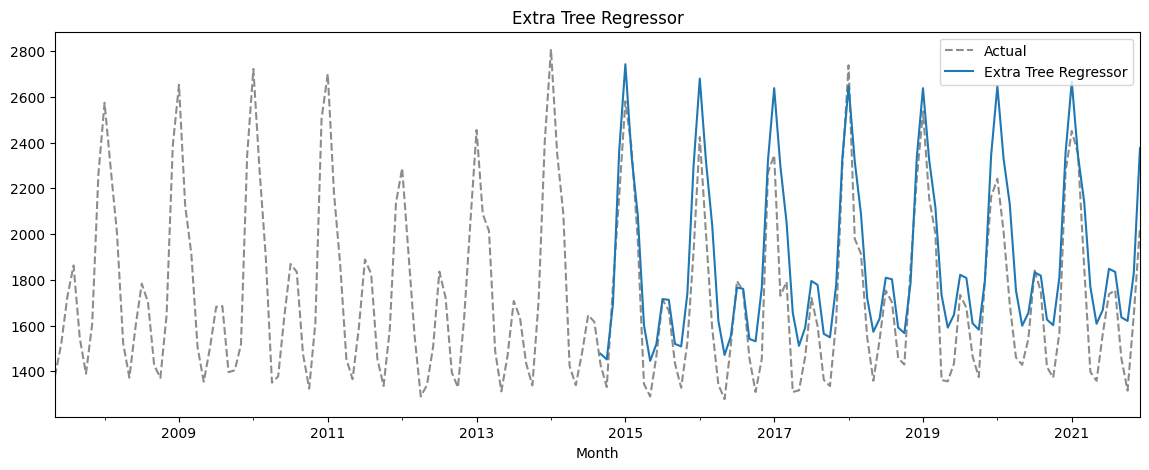

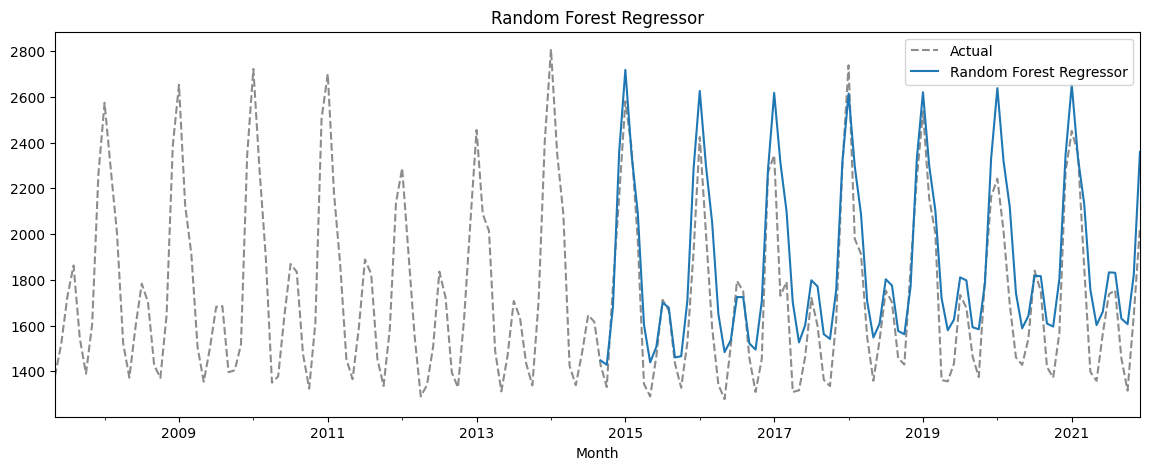

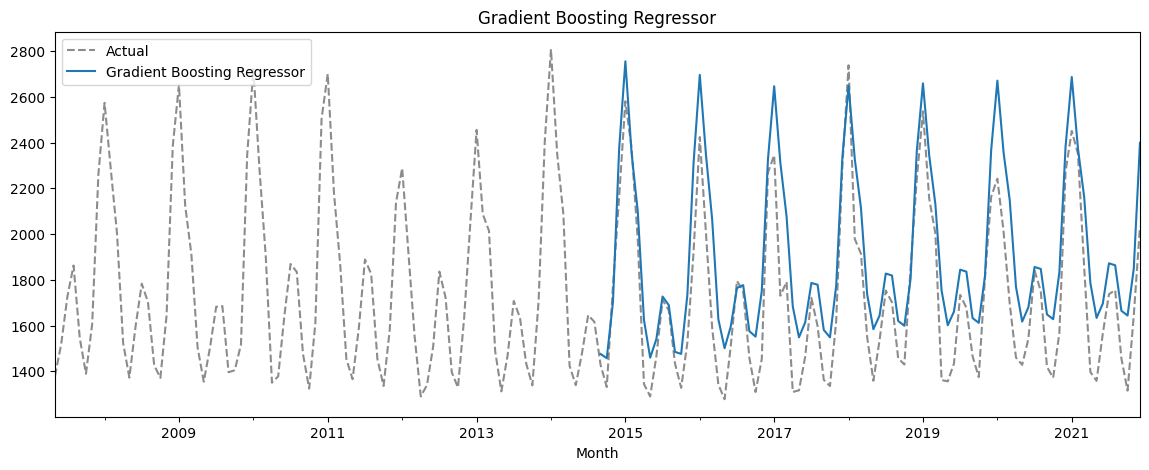

In [38]:

for i in test.iloc[: , 1:]:
    ax = df[-2*len(test):].plot(style='k--', alpha=0.45, title=i)
    test[i].plot(ax=ax)
    plt.legend(['Actual', i])
    plt.show()


In [39]:

test


,y,Naive Forecaster,Linear Regression,K-NN Regressor,Extra Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor
Month,,,,,,,
2014-09-01,1428.555,1210.663512,1441.612460,1429.364383,1476.996301,1447.523573,1475.804086
2014-10-01,1331.478,1189.233073,1425.604618,1397.392401,1452.197277,1428.789144,1457.550039
2014-11-01,1773.932,1400.315878,1715.650462,1686.999710,1696.068561,1682.817445,1703.186602
2014-12-01,2164.807,1943.541073,2346.454781,2293.247940,2361.795772,2359.562442,2374.981222
2015-01-01,2580.929,2239.992643,2687.958228,2751.156269,2742.645449,2718.269492,2755.411366
...,...,...,...,...,...,...,...
2021-08-01,1755.212,1414.440881,1853.913756,1746.050685,1834.825579,1831.173078,1863.734586
2021-09-01,1456.901,1210.663512,1653.305608,1594.985762,1636.313295,1630.579112,1664.976452
2021-10-01,1315.799,1189.233073,1632.237707,1627.545921,1620.287014,1606.569475,1644.048373


In [40]:

def evaluate(df, train, sort_by='MASE'):
    evals = pd.DataFrame(index=['sMAPE', 'MAPE', 'RMSE'])
    y_truth = df['y']
    y_predicted = df.drop(columns=['y'])
    for p in y_predicted:
        evals.loc['sMAPE', p] = mape(y_truth, y_predicted[p], symmetric=True)
        evals.loc['MAPE', p] = mape(y_truth, y_predicted[p], symmetric=False)
        evals.loc['RMSE', p] = np.sqrt(mse(y_truth, y_predicted[p]))
        evals.loc['MASE', p] = mase(y_truth, y_predicted[p], y_train=train)
    return evals.T.sort_values(by=sort_by)


In [46]:

evaluate(test, train)


,sMAPE,MAPE,RMSE,MASE
K-NN Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,192.449319,0.685551
Random Forest Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,205.742859,0.758755
Extra Tree Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,212.223357,0.797333
Linear Regression,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,219.063673,0.828132
Gradient Boosting Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,226.783936,0.863924
Naive Forecaster,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,242.222293,0.957688


In [47]:

evaluate(test, train, sort_by='RMSE')


,sMAPE,MAPE,RMSE,MASE
K-NN Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,192.449319,0.685551
Random Forest Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,205.742859,0.758755
Extra Tree Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,212.223357,0.797333
Linear Regression,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,219.063673,0.828132
Gradient Boosting Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,226.783936,0.863924
Naive Forecaster,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,242.222293,0.957688



## Optimizing with hyper parameter tuning


In [75]:

df = energy.copy()


In [76]:

train, test = split_data(df)


In [77]:

test.shape


(88, 1)

In [78]:

n = len(test)

fh = ForecastingHorizon(np.arange(n) + 1, is_relative=True)

forecaster = TransformedTargetForecaster(
    [("deseasonalize", Deseasonalizer(model="multiplicative", sp=12)),
     ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
     ("forecast",
            make_reduction(
                KNeighborsRegressor(),
                scitype="tabular-regressor",
                window_length=12,
                strategy="recursive",
            ), ),  ])


In [79]:

forecaster.fit(train.values)

test['KNN-Regressor'] = forecaster.predict(fh)


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_966/1839603011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['KNN-Regressor'] = forecaster.predict(fh)


In [80]:

test.head()


,y,KNN-Regressor
Month,,
2014-09-01,1428.555,1404.930420
2014-10-01,1331.478,1400.715430
2014-11-01,1773.932,1733.417657
2014-12-01,2164.807,2333.941613
2015-01-01,2580.929,2777.382750


In [81]:

evaluate(test, train)


,sMAPE,MAPE,RMSE,MASE
KNN-Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,225.568315,0.751772


In [82]:

KNeighborsRegressor()


KNeighborsRegressor()

In [83]:

forecaster.get_params()


{'steps': [('deseasonalize', Deseasonalizer(model='multiplicative', sp=12)),
  ('detrend', Detrender(forecaster=PolynomialTrendForecaster())),
  ('forecast',
   RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(),
                                        window_length=12))],
 'deseasonalize': Deseasonalizer(model='multiplicative', sp=12),
 'detrend': Detrender(forecaster=PolynomialTrendForecaster()),
 'forecast': RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(),
                                      window_length=12),
 'deseasonalize__model': 'multiplicative',
 'deseasonalize__sp': 12,
 'detrend__forecaster': PolynomialTrendForecaster(),
 'detrend__model': 'additive',
 'detrend__forecaster__degree': 1,
 'detrend__forecaster__regressor': None,
 'detrend__forecaster__with_intercept': True,
 'forecast__estimator': KNeighborsRegressor(),
 'forecast__pooling': 'local',
 'forecast__transformers': None,
 'forecast__window_length': 12,
 'forecast__estimator_

In [84]:

forecaster.get_params().keys()


dict_keys(['steps', 'deseasonalize', 'detrend', 'forecast', 'deseasonalize__model', 'deseasonalize__sp', 'detrend__forecaster', 'detrend__model', 'detrend__forecaster__degree', 'detrend__forecaster__regressor', 'detrend__forecaster__with_intercept', 'forecast__estimator', 'forecast__pooling', 'forecast__transformers', 'forecast__window_length', 'forecast__estimator__algorithm', 'forecast__estimator__leaf_size', 'forecast__estimator__metric', 'forecast__estimator__metric_params', 'forecast__estimator__n_jobs', 'forecast__estimator__n_neighbors', 'forecast__estimator__p', 'forecast__estimator__weights'])

In [85]:

# example grid search space
hyperparams_grid = {
    "forecast__estimator__n_neighbors": [i for i in range(3,11)],
    "deseasonalize__model": ['multiplicative', 'additive'],
    "forecast__estimator__p": [1,2]
}


In [86]:

cv = SlidingWindowSplitter(window_length=int(len(df) * 0.70), fh=fh)
smape = MeanAbsolutePercentageError(symmetric=True)

grid_csv = ForecastingGridSearchCV(
    forecaster, 
    strategy="refit", 
    cv=cv,
    param_grid=hyperparams_grid, 
    scoring=smape,
    return_n_best_forecasters=1,
    verbose=1
)


In [87]:

grid_csv.cv


SlidingWindowSplitter(fh=ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88],
      dtype='int64', is_relative=True),
                      window_length=411)

In [88]:

fh


ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88],
      dtype='int64', is_relative=True)

In [89]:

grid_csv.fit(train.values, fh=fh)


/Users/user/opt/anaconda3/envs/py39_time_series/lib/python3.9/site-packages/sktime/forecasting/model_selection/_tune.py:198: UserWarning: in ForecastingGridSearchCV, n_jobs and pre_dispatch parameters are deprecated and will be removed in 0.26.0. Please use n_jobs and pre_dispatch directly in the backend_params argument instead.
  warn(


Fitting 2 folds for each of 32 candidates, totalling 64 fits


ForecastingGridSearchCV(cv=SlidingWindowSplitter(fh=ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88],
      dtype='int64', is_relat...
                                                                       Detrender(forecaster=PolynomialTrendForecaster())),
                                                                      ('forecast',
                                                                       RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(),
                                                                                                            window_length=12))]),
                        param_grid={'deseasonalize__model': ['multiplicative',
                                                             'additive'],
                                    'forecast__estimator__n_neighbors': [3, 4,
                                                                         5, 6,
                                                                         7, 8,
                                                                         9,
                                                                         10],
                                    'forecast__estimator__p': [1, 2]},
                        scoring=MeanAbsolutePercentageError(symmetric=True),
                        verbose=1)

In [90]:

grid_csv.best_forecaster_


TransformedTargetForecaster(steps=[('deseasonalize', Deseasonalizer(sp=12)),
                                   ('detrend',
                                    Detrender(forecaster=PolynomialTrendForecaster())),
                                   ('forecast',
                                    RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(n_neighbors=7),
                                                                         window_length=12))])

In [91]:

grid_csv.best_params_


{'deseasonalize__model': 'additive',
 'forecast__estimator__n_neighbors': 7,
 'forecast__estimator__p': 2}

In [92]:

grid_csv.cv_results_


,mean_test_MeanAbsolutePercentageError,mean_fit_time,mean_pred_time,params,rank_test_MeanAbsolutePercentageError
0,0.068065,0.016240,0.021374,"{'deseasonalize__model': 'multiplicative', 'fo...",28.0
1,0.066450,0.011553,0.018107,"{'deseasonalize__model': 'multiplicative', 'fo...",24.0
2,0.065952,0.011625,0.019161,"{'deseasonalize__model': 'multiplicative', 'fo...",19.0
3,0.064853,0.012292,0.020374,"{'deseasonalize__model': 'multiplicative', 'fo...",11.0
4,0.064658,0.011848,0.018536,"{'deseasonalize__model': 'multiplicative', 'fo...",9.0
5,0.062486,0.011546,0.018167,"{'deseasonalize__model': 'multiplicative', 'fo...",2.0
6,0.064220,0.011487,0.018250,"{'deseasonalize__model': 'multiplicative', 'fo...",7.0
7,0.065216,0.011563,0.018324,"{'deseasonalize__model': 'multiplicative', 'fo...",14.0
8,0.066626,0.011586,0.018472,"{'deseasonalize__model': 'multiplicative', 'fo...",26.0
9,0.065606,0.011571,0.018495,"{'deseasonalize__model': 'multiplicative', 'fo...",15.0


In [93]:

test['KNN_optimized'] = grid_csv.predict(fh)


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_966/3315135934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['KNN_optimized'] = grid_csv.predict(fh)


In [94]:

evaluate(test, train)


,sMAPE,MAPE,RMSE,MASE
KNN_optimized,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,188.102334,0.684741
KNN-Regressor,MeanAbsolutePercentageError(multilevel=Month\n...,MeanAbsolutePercentageError(multilevel=Month\n...,225.568315,0.751772


In [95]:

grid_csv.cv_results_


,mean_test_MeanAbsolutePercentageError,mean_fit_time,mean_pred_time,params,rank_test_MeanAbsolutePercentageError
0,0.068065,0.016240,0.021374,"{'deseasonalize__model': 'multiplicative', 'fo...",28.0
1,0.066450,0.011553,0.018107,"{'deseasonalize__model': 'multiplicative', 'fo...",24.0
2,0.065952,0.011625,0.019161,"{'deseasonalize__model': 'multiplicative', 'fo...",19.0
3,0.064853,0.012292,0.020374,"{'deseasonalize__model': 'multiplicative', 'fo...",11.0
4,0.064658,0.011848,0.018536,"{'deseasonalize__model': 'multiplicative', 'fo...",9.0
5,0.062486,0.011546,0.018167,"{'deseasonalize__model': 'multiplicative', 'fo...",2.0
6,0.064220,0.011487,0.018250,"{'deseasonalize__model': 'multiplicative', 'fo...",7.0
7,0.065216,0.011563,0.018324,"{'deseasonalize__model': 'multiplicative', 'fo...",14.0
8,0.066626,0.011586,0.018472,"{'deseasonalize__model': 'multiplicative', 'fo...",26.0
9,0.065606,0.011571,0.018495,"{'deseasonalize__model': 'multiplicative', 'fo...",15.0


In [97]:

model = grid_csv.best_forecaster_


In [98]:

model.get_params()


{'steps': [('deseasonalize', Deseasonalizer(sp=12)),
  ('detrend', Detrender(forecaster=PolynomialTrendForecaster())),
  ('forecast',
   RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(n_neighbors=7),
                                        window_length=12))],
 'deseasonalize': Deseasonalizer(sp=12),
 'detrend': Detrender(forecaster=PolynomialTrendForecaster()),
 'forecast': RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(n_neighbors=7),
                                      window_length=12),
 'deseasonalize__model': 'additive',
 'deseasonalize__sp': 12,
 'detrend__forecaster': PolynomialTrendForecaster(),
 'detrend__model': 'additive',
 'detrend__forecaster__degree': 1,
 'detrend__forecaster__regressor': None,
 'detrend__forecaster__with_intercept': True,
 'forecast__estimator': KNeighborsRegressor(n_neighbors=7),
 'forecast__pooling': 'local',
 'forecast__transformers': None,
 'forecast__window_length': 12,
 'forecast__estimator__algorithm': 'a